In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from utils.dataManagers.dataSteward import DataSteward
from utils.dataManagers.informations import informer
from utils.predictions import *
from utils.dataManagers.dataWrangler import *

ds = DataSteward('mapper_and_most_frequent', 'mean')
column_desc = informer.get_column_descriptions()

train = ds.train_data
test = ds.test_data
ytrain = ds.train_response

In [2]:
from scipy.stats import skew
number_type = get_number_types(train)
categorical = get_categoricals(train)

skewness = number_type.apply(lambda x: skew(x))
cols_to_log = skewness[np.abs(skewness.sort_values()) >= .75].index

train_log = log_given_columns(train, cols_to_log)
test_log = log_given_columns(test, cols_to_log)
trainWithDummies, testWithDummies = get_df_for_predictions(train_log, test_log)

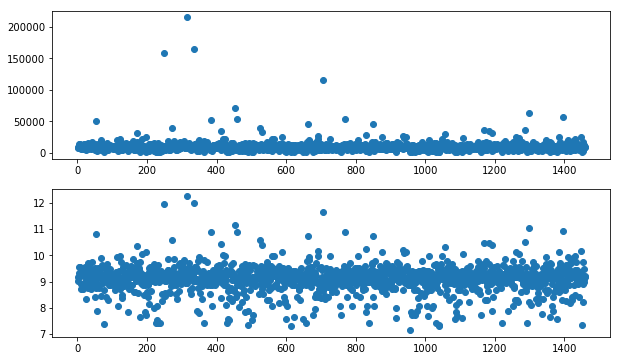

In [35]:
fig, ax = plt.subplots(nrows=2, figsize=[10, 6])
ax[0].scatter(train.index, train.LotArea)
ax[1].scatter(train.index, np.log1p(train.LotArea))

L1        L2              type
0  5.130036  2.413126  (12.217, 12.656]
1  4.558967 -0.104084  (11.778, 12.217]
2  4.882688  2.964570  (12.217, 12.656]
3  4.347160 -0.500444  (11.778, 12.217]
4  4.718355  5.016684  (12.217, 12.656]

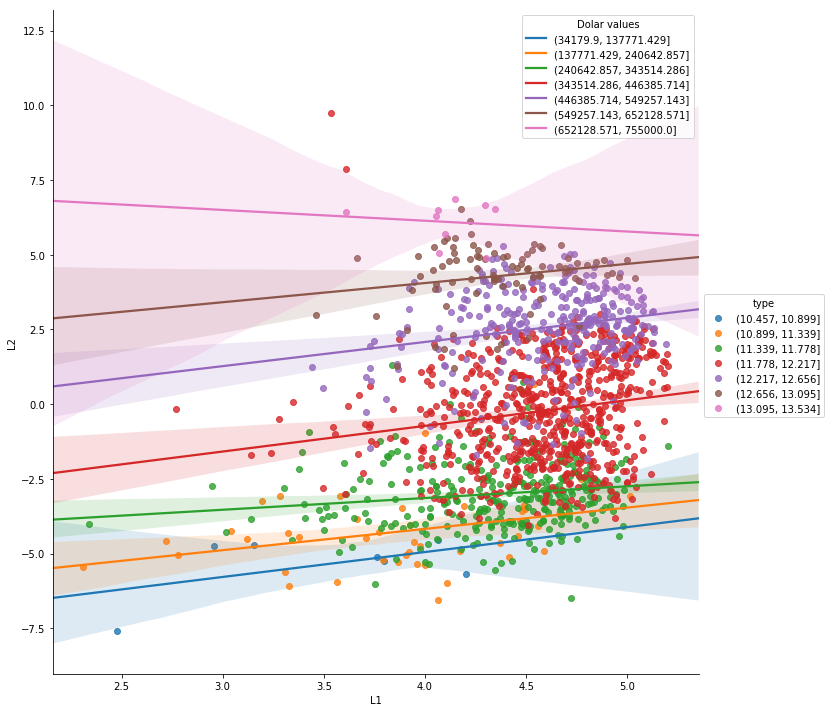

In [380]:
from sklearn.decomposition import TruncatedSVD
y = np.log1p(ytrain)
svd = TruncatedSVD()
bins = 7

svd_train = svd.fit_transform(trainWithDummies)
svd_train = pd.DataFrame(svd_train)
svd_train.columns = ['L1', 'L2']
svd_train['type'] = pd.cut(y.values, bins=bins)
svd_train.head()

sns.lmplot(data=svd_train, x='L1', y='L2', hue='type', size=10)

legend = list(pd.cut(ytrain, bins=bins).unique().sort_values(ascending=True))
plt.legend(legend, title='Dolar values')

In [3]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_jobs=-1)
iso.fit(trainWithDummies.values)
data_projected = iso.transform(trainWithDummies.values)
data_projected.shape

Isomap(eigen_solver='auto', max_iter=None, n_components=3, n_jobs=-1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

(1460, 3)

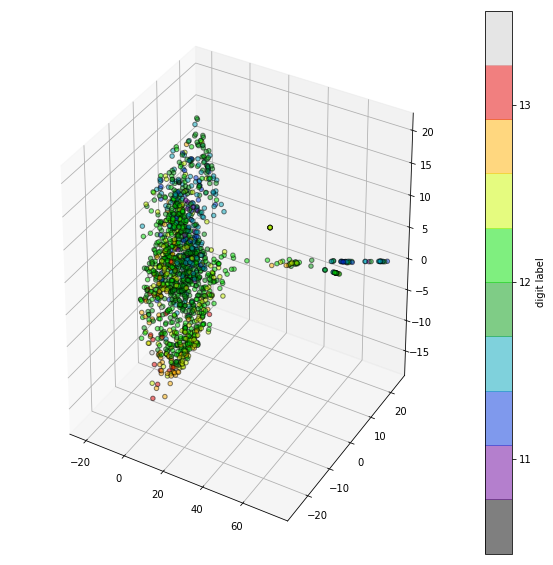

In [4]:
from mpl_toolkits.mplot3d import Axes3D

y = np.log1p(ytrain)

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

p = ax.scatter3D(data_projected[:, 0], data_projected[:, 1], data_projected[:, 2],
            c=y.values, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

fig.colorbar(p, label='digit label', ticks=range(int(y.min()), int(y.max()) + 1),
            cmap=plt.cm.get_cmap('nipy_spectral', 10) )

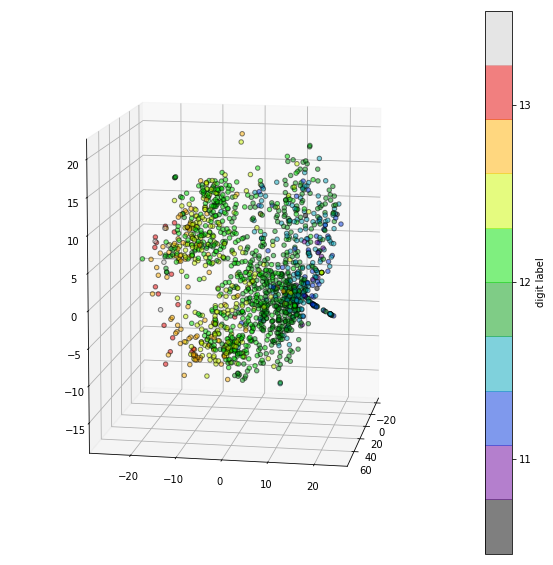

In [5]:
ax.view_init(10, 10)
fig

Maby delete those outliers?

In [383]:
pd.DataFrame(data_projected)

0          1          2
0      2.822213  10.461234   1.918621
1     -9.127374   2.708934  -7.491843
2      2.983306  13.488842   2.189803
3     -7.136257  -8.789216   4.934104
4      5.518726  17.657296   4.154904
5     40.292871 -10.153397   0.529232
6      8.396759   6.031733  -9.674170
7     -1.396082  13.785400   3.858795
8     -9.850387 -11.911778  17.831515
9    -10.581657  -8.598662  -3.787007
10   -10.716658  -7.680063  -3.289419
11     6.549495  23.209732  -2.715635
12    -9.073922  -5.311003  -8.500406
13    10.931777   5.424380  -7.009864
14    -3.943330  -8.819910  -3.147895
15   -10.800562  -6.008369   9.054909
16   -12.058156   0.030820   1.678760
17    66.552895 -20.713773   0.248211
18    -0.322155  -1.316667  -6.855839
19   -13.524320  -8.744666  -2.888917
20    11.206130  12.584018   7.329278
21   -11.787104 -17.557203   7.301898
22    14.499768   2.668939   1.087022
23    -2.290060  -5.263732  -4.525958
24   -10.033785  -7.029689  -7.773126
25    11.699622   8.274964  -6.165931
26   -12.267656  -6.571124  -8.130461
27     9.731207  10.093326  -8.642318
28   -10.960968  -0.927197  -6.051186
29   -12.963702 -16.005162   5.130055
...         ...        ...        ...
1430   3.145637  11.636099  11.936799
1431   1.894297  -7.575987  -7.365472
1432 -11.032960 -10.681022   4.330198
1433   4.592757   6.931010  11.494280
1434  -5.958318  -1.527513  -8.233066
1435  -5.808528   0.138060   3.105740
1436  -6.528272  -8.069566  -6.921430
1437  38.224017  -9.764819   0.585410
1438 -13.008307  -9.837792  -7.429142
1439  -3.401091   5.012926   6.416822
1440  58.387681 -13.871237   0.119720
1441  -1.702475   1.776117 -13.817731
1442   3.899958  22.476715   0.876712
1443 -17.211408 -12.520247   6.414539
1444  11.889445   1.711237  -2.730213
1445 -14.474822  -7.224555 -13.144759
1446 -11.594039  -1.797090  -6.111213
1447   4.259121  13.570094   1.726997
1448 -16.896274  -7.850632   6.771644
1449 -17.265179  -8.430207  -4.528310
1450 -19.611240  -9.405281   9.367333
1451  13.625414   7.424538  -4.378397
1452  -8.608864   3.878067 -11.808352
1453   0.191868  -4.405022  -1.523975
1454   9.923227   1.843874  -5.434883
1455   2.008591   5.985083  11.765165
1456  -3.889460   1.669496 -12.224405
1457  -3.870398  10.392568  11.754713
1458 -15.426802  -4.663668 -12.634387
1459 -13.951978  -4.473192  -7.125470

[1460 rows x 3 columns]

In [6]:
y = np.log1p(ytrain)

def init():
    fig = plt.figure()
    ax = Axes3D(fig)

    p = ax.scatter(data_projected[:, 0], data_projected[:, 1], data_projected[:, 2],
                c=y.values, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('nipy_spectral', 10))

    fig.colorbar(p, label='digit label', ticks=range(int(y.min()), int(y.max()) + 1),
                cmap=plt.cm.get_cmap('nipy_spectral', 10) )
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

In [16]:
from matplotlib import animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=360, interval=20, blit=True)
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

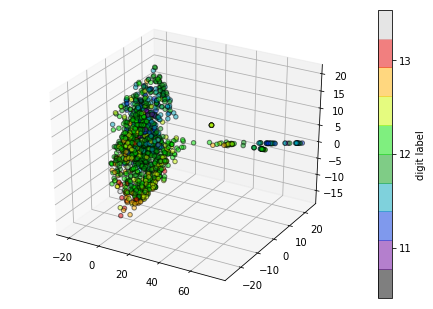

In [18]:
from IPython.display import HTML
HTML(anim.to_html5_video())

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


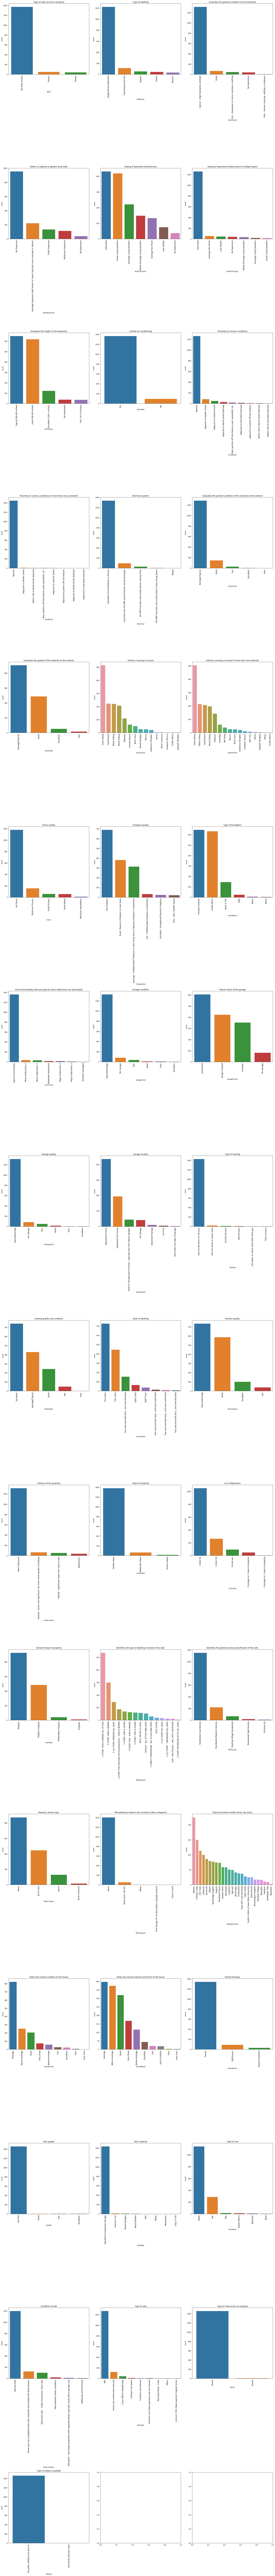

In [4]:
def format_xticks(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        tick.set_fontsize(12) 

def get_list_of_columns_ordered_by_value_counts(series):
    return list(series.value_counts().index)
        
def plot_categoricals(categorical, ncols = 2, figsize_ratio=[8, 14]):
    nrows = math.ceil(categorical.shape[1] / ncols)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows,\
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows),\
                           tight_layout=True)

    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(categorical):
        axes = ax[i]
        sns.countplot(categorical[cat], ax=axes,\
                      order=get_list_of_columns_ordered_by_value_counts(categorical[cat]))
        format_xticks(axes)
        axes.set_title(column_desc[cat])
    
plot_categoricals(categorical, ncols=3)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


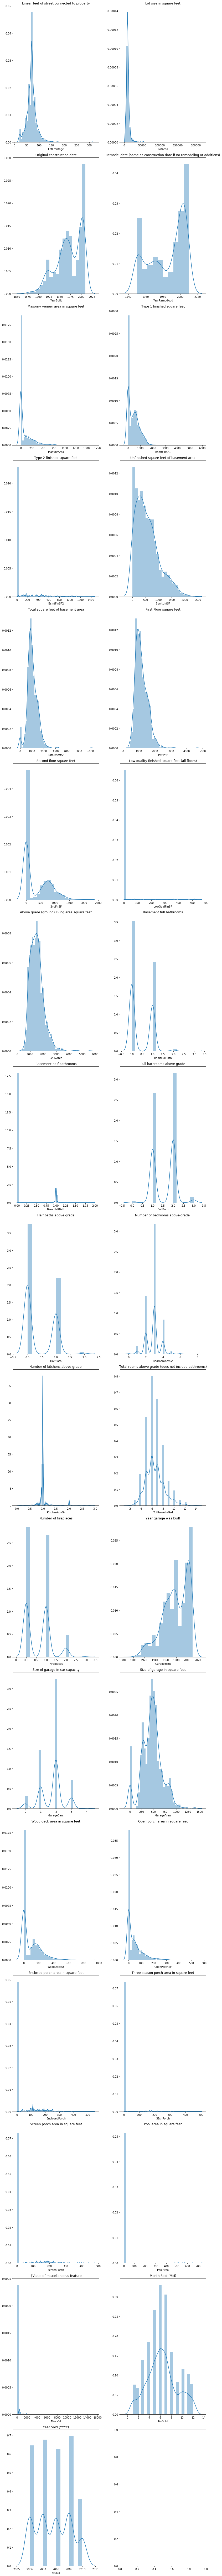

In [39]:
def plot_number_type_data(df, plot_function, ncols = 2, figsize_ratio=[6, 8]):
    nrows = math.ceil(df.shape[1] / ncols)
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    ax = np.array(ax).reshape(-1)
    
    for i, cat in enumerate(df):
        axes = ax[i]
        plot_function(df[cat], ax=axes)
        axes.set_title(column_desc[cat])
    
plot_number_type_data(number_type, sns.distplot)

In [80]:
def plot_number_type_data(df, plot_function, options=[], figsize_ratio=[6, 8]):
    ncols = len(options) + 1
    nrows = math.ceil(df.shape[1])
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, 
                           figsize=(figsize_ratio[0] * ncols, figsize_ratio[1] * nrows), tight_layout=True)
    #reshaping ax when only one plot in row is needed
    if len(options) == 0:
        ax = ax.reshape([-1,1])
    
    for i, cat in enumerate(df):
        col_num = 0
        series = df[cat]
        plot_function(df[cat], ax=ax[i, 0], color="#9b59b6")
        ax[i, col_num].set_title(column_desc[cat])
        
        if 'zero_vals_cut' in options:
            col_num += 1
            plot_function(series[series != 0], ax=ax[i, 1], color="#3498db")
            ax[i, col_num].set_title(column_desc[cat] +' without zero values')
        if 'vals_log' in options:
            col_num += 1
            plot_function(np.log(series[series != 0]), ax=ax[i, 2], color="#e74c3c")
            ax[i, col_num].set_title('Logarithm of ' + column_desc[cat] +' without zero values')
            ax[i, col_num].set_xlabel(f'np.log({cat})')
         
   

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


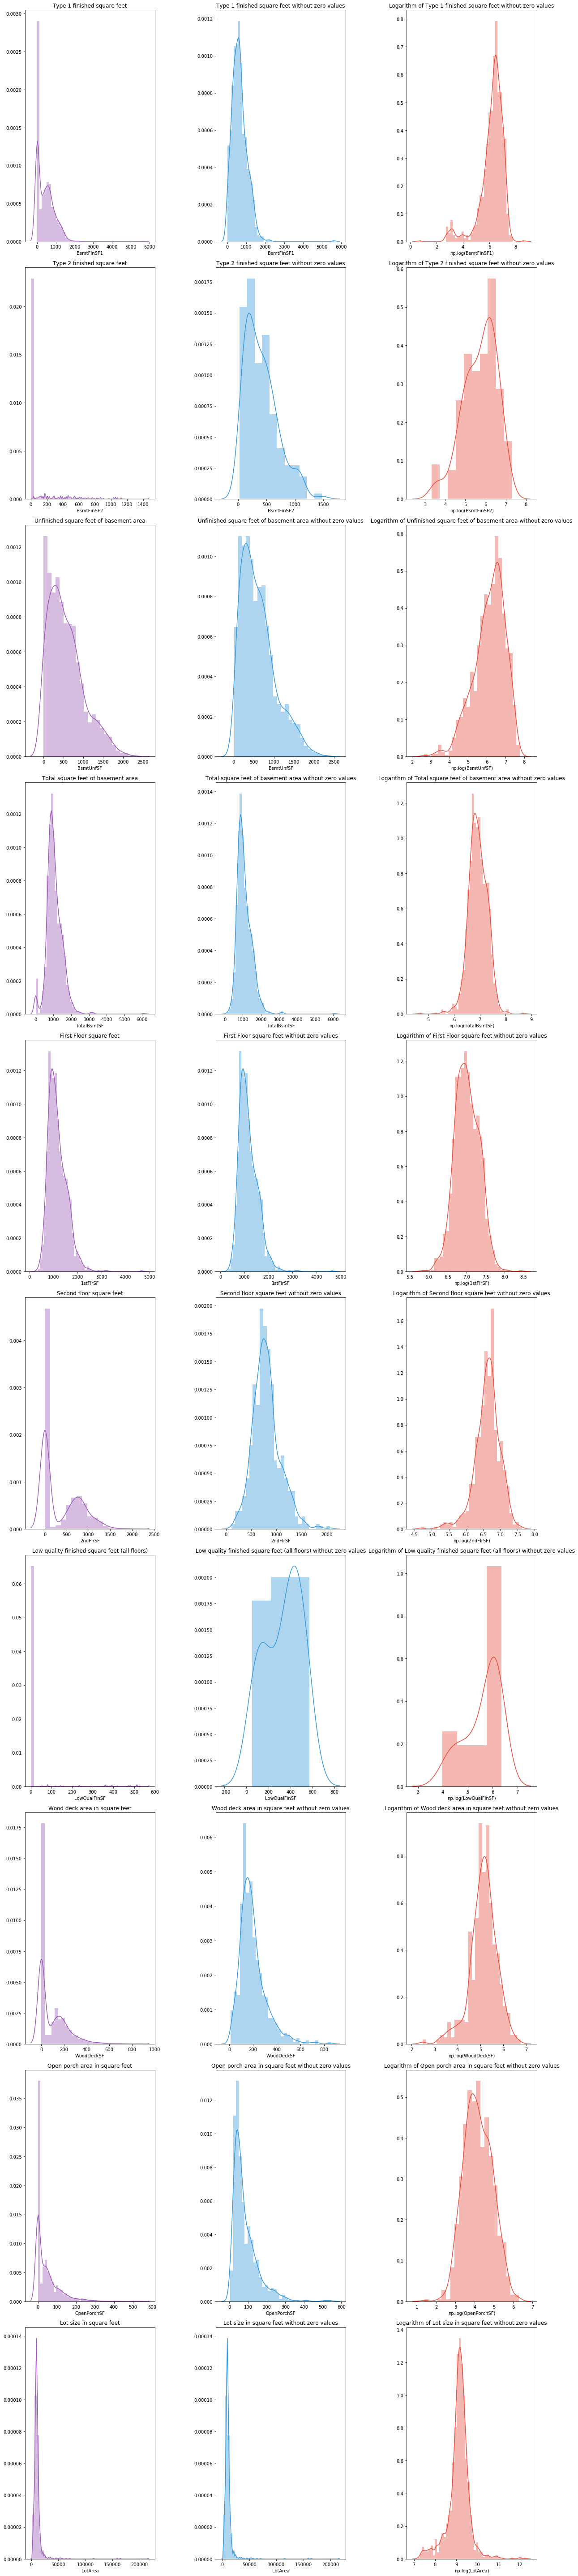

In [74]:
square_feet_columns = [s for s in list(number_type.columns) if 'sf' in s.lower()]
square_feet_columns.extend(['LotArea'])
df = train[square_feet_columns]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut', 'vals_log'])

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


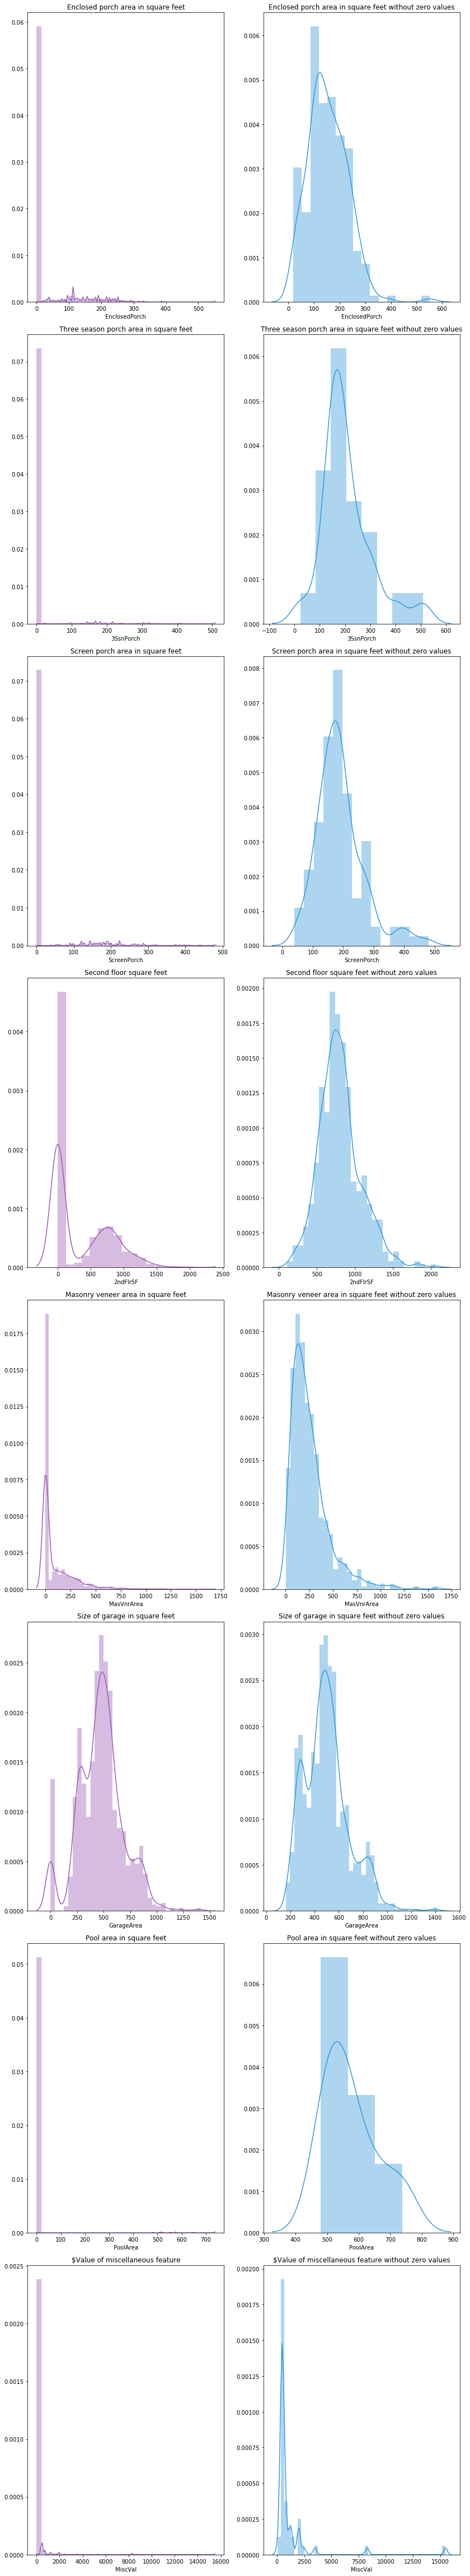

In [68]:
cols = ['EnclosedPorch', '3SsnPorch', 'ScreenPorch', '2ndFlrSF', 'MasVnrArea', 'GarageArea', 'PoolArea', 'MiscVal']
df = train[cols]

plot_number_type_data(df, sns.distplot, options=['zero_vals_cut'])

In [279]:
df = train.copy()
df['SalePrice'] = ytrain
df['cstperSFofLotArea'] = df.SalePrice / train.LotArea
df['cstperSFofLivingSpace'] = df.SalePrice / (df.TotalBsmtSF + df.GrLivArea)
# neighborhood_mean_price = list(df.groupby('Neighborhood').SalePrice.mean().sort_values().index)
neighborhood_mean_price_perSFofLotArea = df.groupby(by='Neighborhood').cstperSFofLotArea.mean().sort_values(ascending=False).index
neighborhood_mean_price_persfofLivingSpace = df.groupby(by='Neighborhood').cstperSFofLivingSpace.mean().sort_values(ascending=False).index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

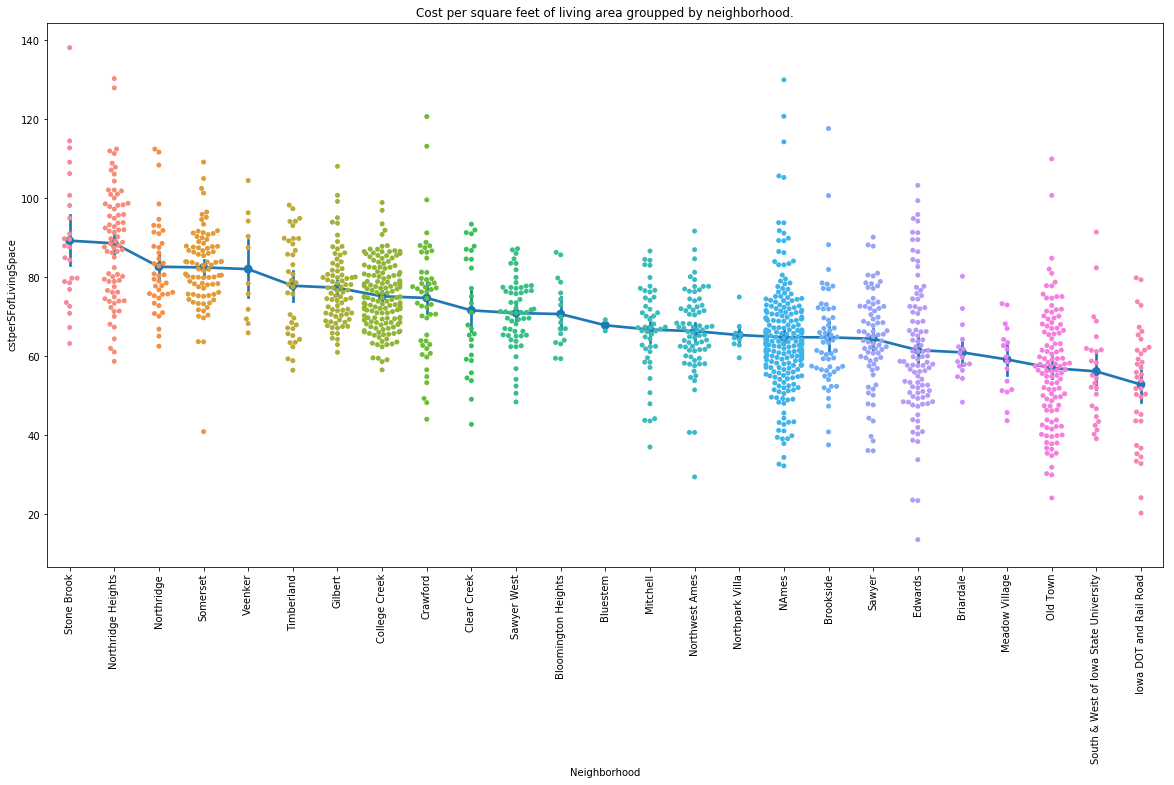

In [181]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace)
plt.xticks(rotation=90)
plt.title('Cost per square feet of living area groupped by neighborhood.')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

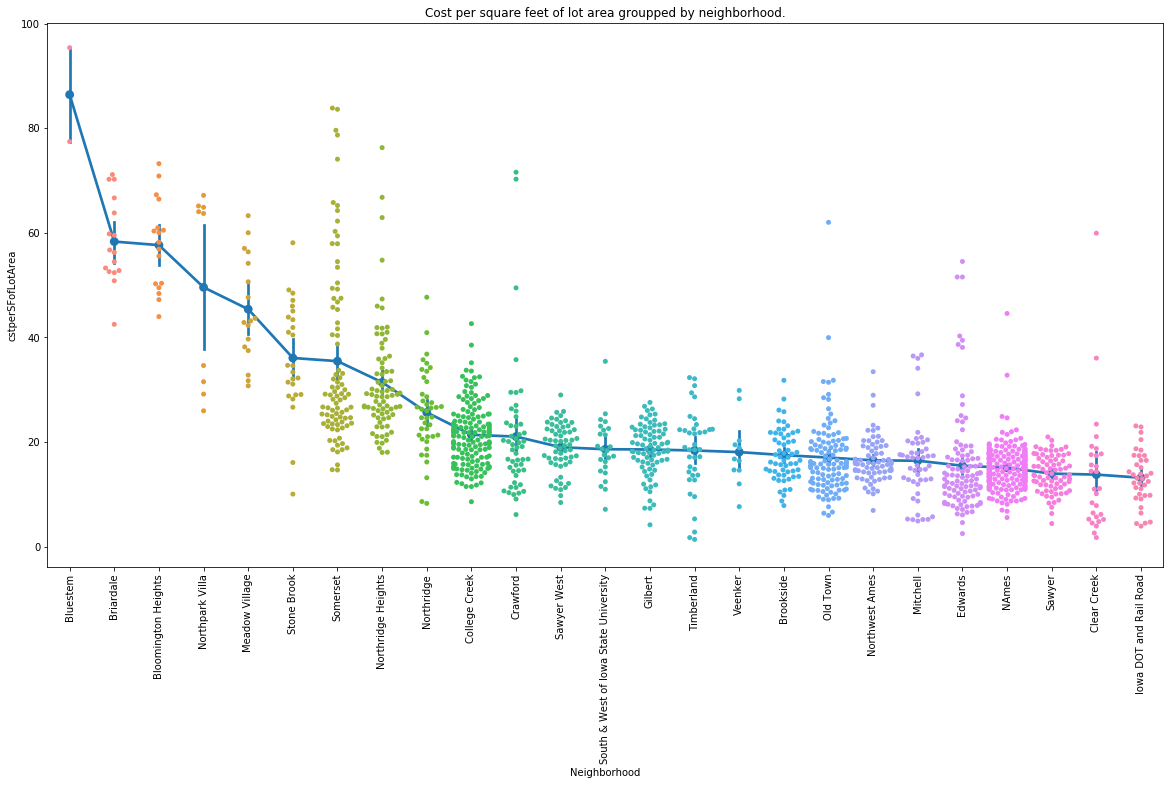

In [180]:
fig, ax = plt.subplots(figsize=[20,10])
sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea)
plt.xticks(rotation=90)
plt.title('Cost per square feet of lot area groupped by neighborhood.')

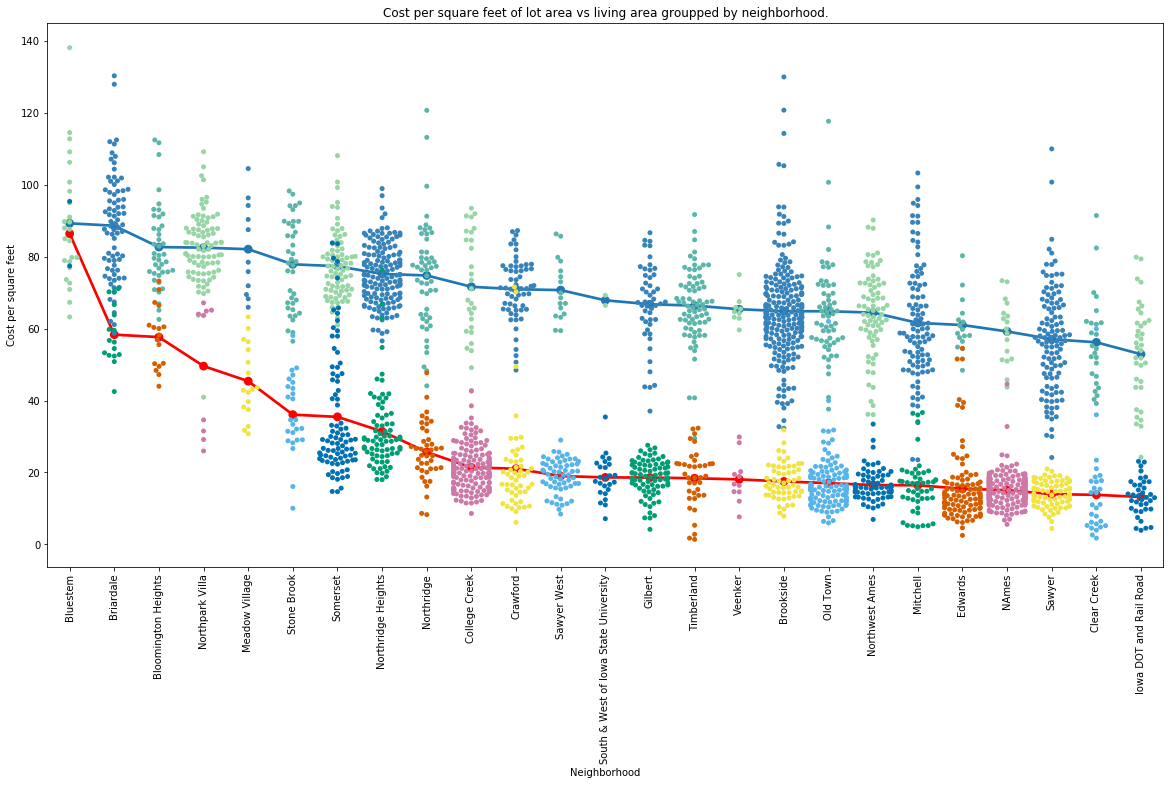

In [222]:
palette= [ '#96D5A4', '#3682BA', '#5BB6A9']

fig, ax = plt.subplots(figsize=[20,10])
_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace,
              palette=sns.color_palette(palette))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, errwidth=0)

_ = sns.swarmplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea,
              palette=sns.color_palette("colorblind"))
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', errwidth=0)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')

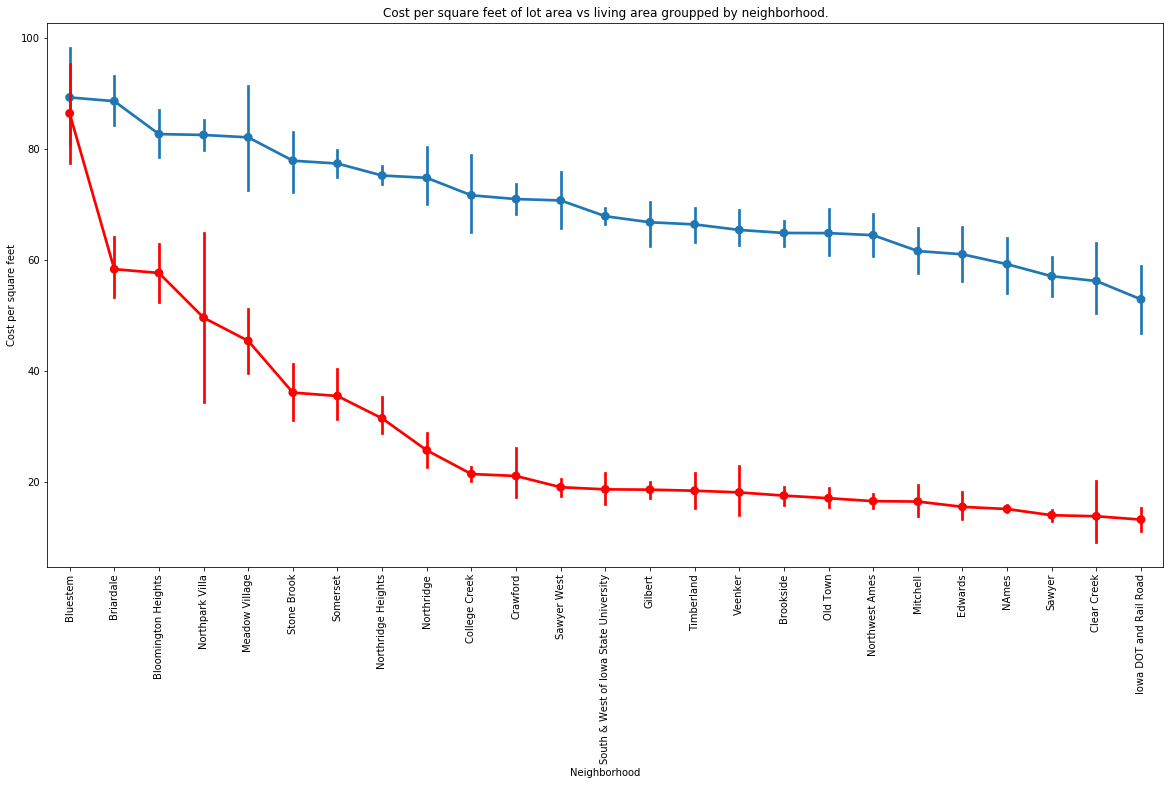

In [238]:
fig, ax = plt.subplots(figsize=[20,10])
_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLivingSpace, order=neighborhood_mean_price_persfofLivingSpace, ci=99)

_ = sns.pointplot(x=df.Neighborhood, y=df.cstperSFofLotArea, order=neighborhood_mean_price_perSFofLotArea, color='r', ci=99)

_ = plt.xticks(rotation=90)
_ = plt.ylabel('Cost per square feet')
_ = plt.title('Cost per square feet of lot area vs living area groupped by neighborhood.')


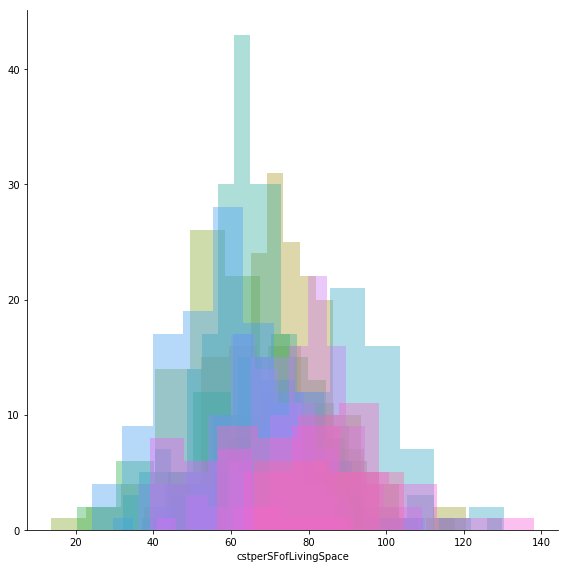

In [182]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'cstperSFofLivingSpace', kde=False)

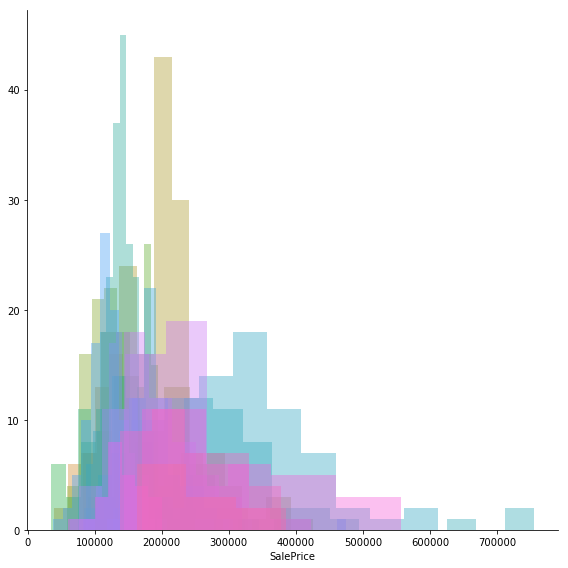

In [154]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'SalePrice', kde=False)

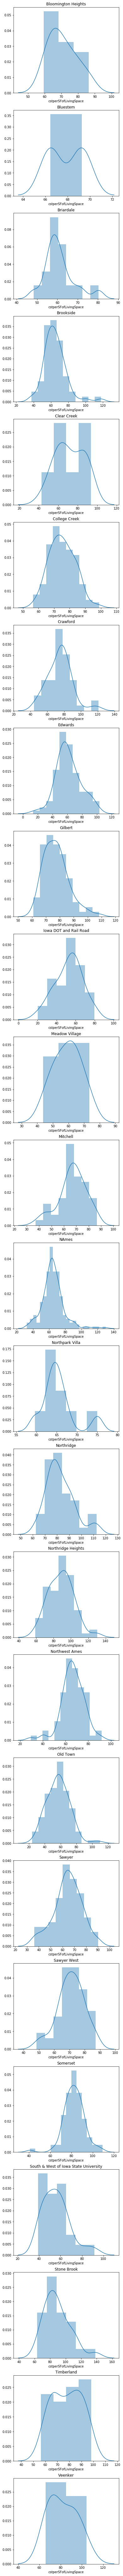

In [239]:
gr = df.groupby('Neighborhood')
nrows=len(gr)
fig, ax = plt.subplots(nrows=nrows, figsize=[6, nrows*6])
i=0
for name, vals in df.groupby('Neighborhood'):
    _ = sns.distplot(vals.cstperSFofLivingSpace, ax=ax[i])
    _ = ax[i].set_title(name)
    i+=1

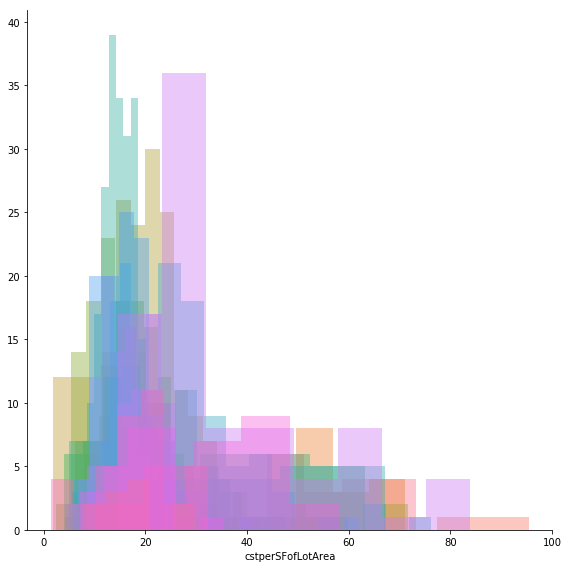

In [183]:
g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'cstperSFofLotArea', kde=False)

In [78]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

vc = df.Neighborhood.value_counts()
cols = vc[vc >= vc.median()].index

data = []
for n in cols:
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

In [77]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

vc = df.Neighborhood.value_counts()
cols = vc[vc <= vc.median()].index

data = []
for n in cols:
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

data = []
for n in df.Neighborhood.unique():
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

In [75]:
import plotly.plotly as py
import plotly.graph_objs as go

df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

data = []
for n in df.Neighborhood.unique():
    trace = go.Histogram(x=df[df.Neighborhood == n].SalePrice, name=n)
    data.append(trace)

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='stacked histogram')

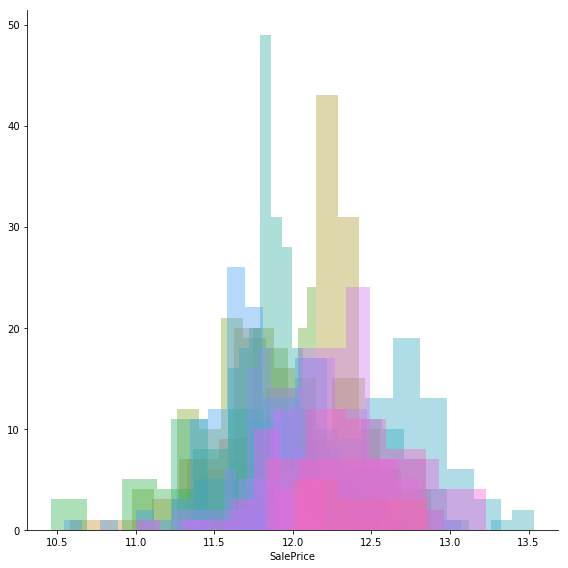

In [5]:
df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'SalePrice', kde=False)

In [ ]:
df = train.copy()
df['SalePrice'] = np.log1p(ytrain)

g = sns.FacetGrid(df, hue='Neighborhood', size=8)
g =g.map(sns.distplot, 'SalePrice', kde=False, bins=30)

c:\users\matka\anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


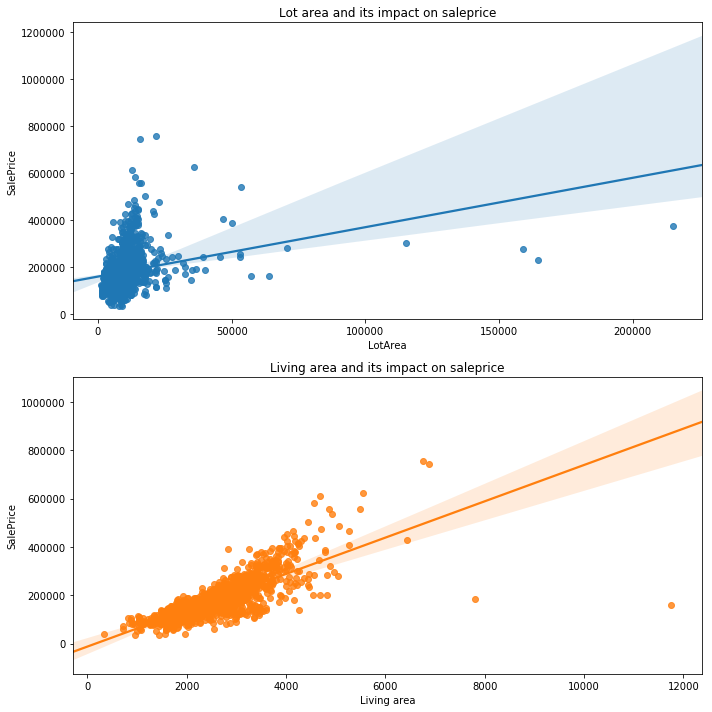

In [292]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10], tight_layout=True)
_ = sns.regplot(df.LotArea, df.SalePrice, ax=ax[0])
_ = ax[0].set_title('Lot area and its impact on saleprice')
_ = sns.regplot((df.TotalBsmtSF + df.GrLivArea), df.SalePrice, ax=ax[1])
_ = ax[1].set_title('Living area and its impact on saleprice')
_ = ax[1].set_xlabel('Living area')

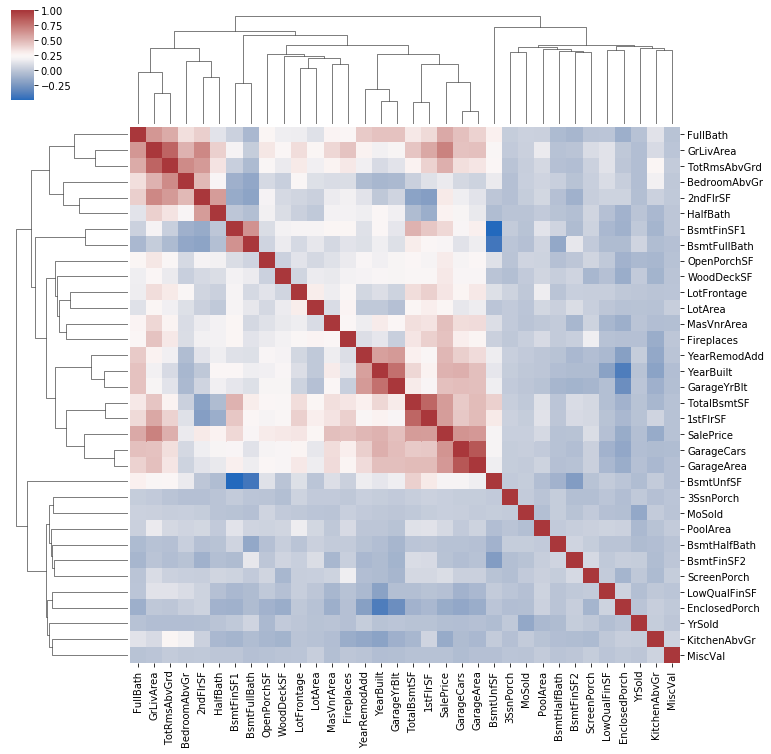

In [268]:
df = train.copy()
df['SalePrice'] = ytrain

sns.clustermap(df.corr(), cmap="vlag", figsize=[12,12])

In [299]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice                1.000000
GrLivArea                0.708624
cstperSFofLivingSpace    0.640819
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.475241
GarageYrBlt              0.470177
Fireplaces               0.466929
BsmtFinSF1               0.386420
LotFrontage              0.334901
WoodDeckSF               0.324413
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
HalfBath                 0.284108
cstperSFofLotArea        0.273401
LotArea                  0.263843
BsmtFullBath             0.227122
BsmtUnfSF                0.214479
BedroomAbvGr             0.168213
ScreenPorch              0.111447
PoolArea                 0.092404
MoSold                   0.046432
3SsnPorch                0.044584
BsmtFinSF2    